In [215]:

import requests
parameters = {
    'q': 'Apple',
    'domains': 'marketwatch.com,cnbc.com,wsj.com,forbes.com',
    'sortBy': 'publishedAt',
    'apiKey': '1b20fb6f9b9d40f0b4e4ad6fe5d90755'  # Assurez-vous d'utiliser votre propre clé API
}

url = 'https://newsapi.org/v2/everything'

# Appel de l'API
response = requests.get(url, params=parameters)
articles = response.json().get('articles', [])  # Utilisez .get pour éviter les erreurs si 'articles' n'existe pas

# Itérer sur chaque article récupéré
for article in articles:
    title = article.get('title', 'Titre indisponible')  # Utilisez .get pour éviter les erreurs si 'title' n'existe pas
    source_name = article.get('source', {}).get('name', 'Source indisponible')  # Récupérer le nom de la source
    url = article.get('url', 'URL indisponible')  # Récupérer l'URL de l'article
    print(f"Titre: {title}\nSource: {source_name}\nURL: {url}\n")


Titre: ‘Fortnite’ Has Actually Made The Metaverse After Everyone Else Quit
Source: Forbes
URL: https://www.forbes.com/sites/paultassi/2023/12/10/fortnite-has-actually-made-the-metaverse-after-everyone-else-quit/

Titre: The Top Premium Scotch Whiskies: 2023 Beverage Testing Institute
Source: Forbes
URL: https://www.forbes.com/sites/joemicallef/2023/12/10/the-top-premium-scotch-whiskies-2023-beverage-testing-institute/

Titre: Business Tech Roundup: Microsoft Teams Moves A Step Closer To No Longer Being Part Of Office
Source: Forbes
URL: https://www.forbes.com/sites/quickerbettertech/2023/12/10/business-tech-roundup-microsoft-teams-moves-a-step-closer-to-no-longer-being-part-of-office/

Titre: 2023 Forbes Holiday Cocktail Guide
Source: Forbes
URL: https://www.forbes.com/sites/karlaalindahao/2023/12/08/best-holiday-cocktail-recipes-2023/

Titre: NBA In-Season Tournament Championship Tips Off Tonight: Here’s What To Know About The New Competition
Source: Forbes
URL: https://www.forbes.com

In [220]:
import csv

with open('articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Titre', 'URL', 'Date de publication', 'Description','Source'])
    for article in articles:
        if "Apple" not in article['title']:
          continue
        writer.writerow([article['title'], article['url'], article['publishedAt'], article['description'], article['source']['name']])

       



# Récupération du contenu des articles

In [221]:
import pandas as pd

df=pd.read_csv('articles.csv')
df

,Titre,URL,Date de publication,Description,Source
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09T20:30:22Z,Apple’s awkward MacBook Pro may look attractiv...,Forbes
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09T14:42:17Z,iPhone 16 Pro models will be the first to bene...,Forbes
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09T14:38:43Z,There’s a big iPhone update coming and it’s fu...,Forbes
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09T12:30:29Z,Forget iPhone 15—Apple suddenly has a major iP...,Forbes
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08T21:32:17Z,This week’s Apple headlines; Apple’s iPhone 16...,Forbes
5,"Apple iPhone, Watch product design head to lea...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08T20:37:19Z,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch
6,": Apple iPhone, Watch product design head to l...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08T20:30:00Z,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch
7,Apple's latest moves in India underscore data ...,https://www.cnbc.com/2023/12/08/apples-latest-...,2023-12-08T18:20:47Z,India's economy is about 16½ years behind Chin...,CNBC
8,No-One Cares Which Bank Provides Their Apple Card,https://www.forbes.com/sites/davidbirch/2023/1...,2023-12-08T11:57:45Z,So long as my rewards card works and I get my ...,Forbes
9,Apple Wants To Make 1-In-4 iPhones In India As...,https://www.forbes.com/sites/siladityaray/2023...,2023-12-08T11:48:48Z,Apple wants to expand its Indian manufacturing...,Forbes


In [224]:
urls = [url for url in df['URL']]
html_contents = []
compteur=0
df['Contenu']=[None] * len(df)

for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        html_contents.append(response.text)
        df['Contenu'].loc[compteur]=response.text
    else:
        print(f"Échec de récupération pour {url}")
    compteur+=1

df.head()

/var/folders/pm/jc2tztb55jbddh9mt9p3ckn00000gn/T/ipykernel_30742/2561202850.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Titre,URL,Date de publication,Description,Source,Contenu
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."


In [225]:
#Transformation de la colonne Date de publication en DateTime

df['Date de publication']=pd.to_datetime(df['Date de publication'])
df.head()

,Titre,URL,Date de publication,Description,Source,Contenu
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."


Comparaison de la taille des différents titres / descriptions / contenus

In [190]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


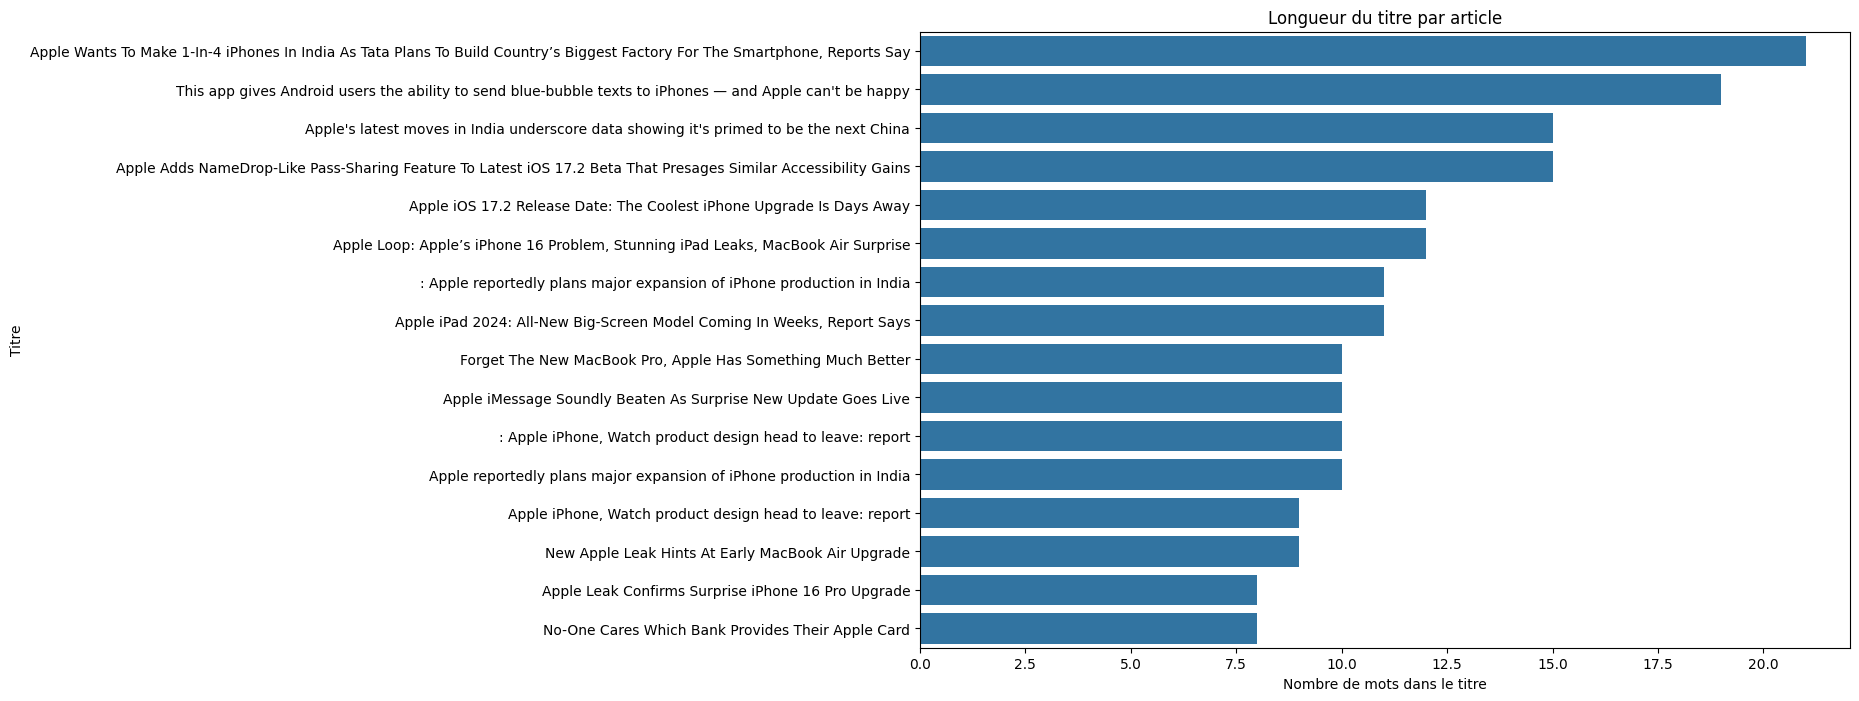

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Title_length']=df['Titre'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Title_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Title_length', y='Titre', data=df_sorted_by_title, orient='h')

plt.xlabel('Nombre de mots dans le titre')
plt.ylabel('Titre')
plt.title('Longueur du titre par article')
plt.show()

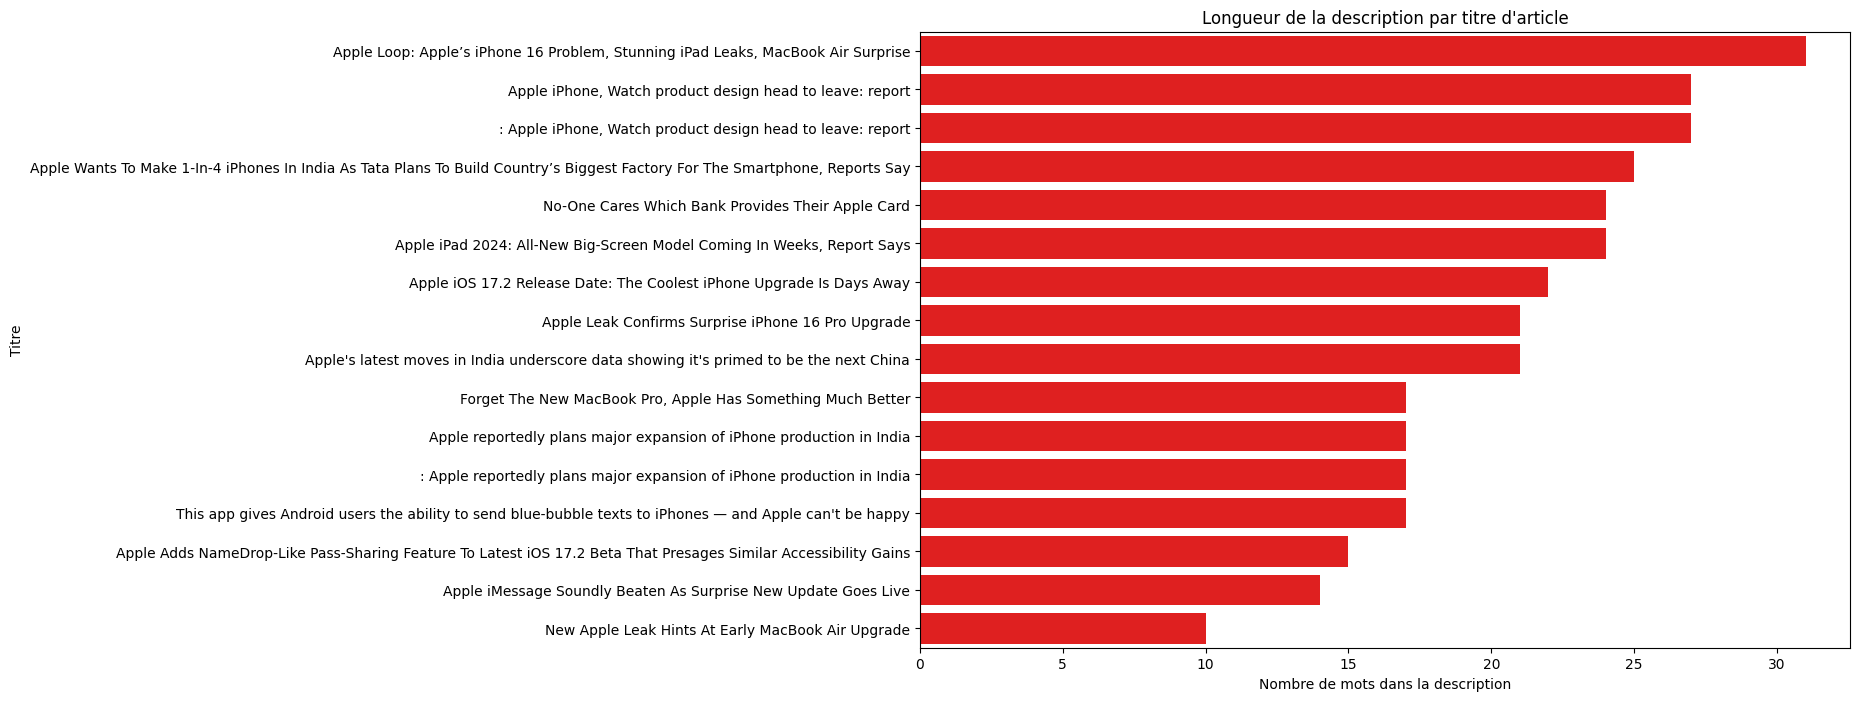

In [227]:
df['Description_length']=df['Description'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Description_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Description_length', y='Titre', data=df_sorted_by_title, orient='h', color='red')

plt.xlabel('Nombre de mots dans la description')
plt.ylabel('Titre')
plt.title('Longueur de la description par titre d\'article')
plt.show()

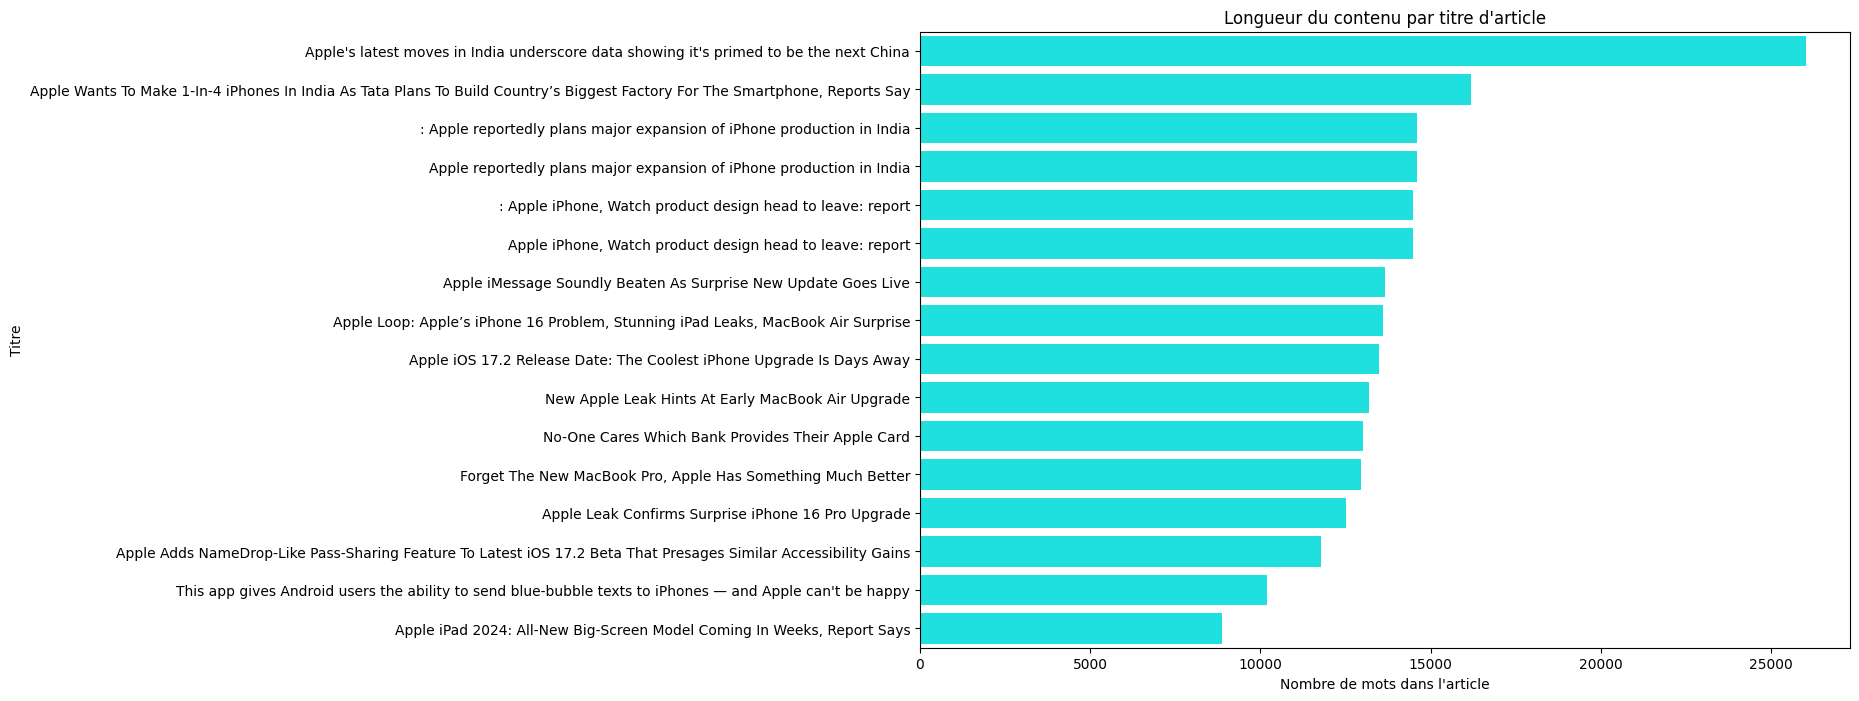

In [228]:
df['Content_length']=df['Contenu'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Content_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Content_length', y='Titre', data=df_sorted_by_title, orient='h', color='cyan')

plt.xlabel("Nombre de mots dans l'article")
plt.ylabel('Titre')
plt.title('Longueur du contenu par titre d\'article')
plt.show()

In [229]:
df_sorted_by_title

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length
7,Apple's latest moves in India underscore data ...,https://www.cnbc.com/2023/12/08/apples-latest-...,2023-12-08 18:20:47+00:00,India's economy is about 16½ years behind Chin...,CNBC,"<!DOCTYPE html><html lang=""en"" prefix=""og=http...",15,21,26008
9,Apple Wants To Make 1-In-4 iPhones In India As...,https://www.forbes.com/sites/siladityaray/2023...,2023-12-08 11:48:48+00:00,Apple wants to expand its Indian manufacturing...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",21,25,16170
11,: Apple reportedly plans major expansion of iP...,https://www.marketwatch.com/story/apple-report...,2023-12-08 04:23:00+00:00,Apple Inc. is planning a massive expansion of ...,MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",11,17,14602
10,Apple reportedly plans major expansion of iPho...,https://www.marketwatch.com/story/apple-report...,2023-12-08 04:23:00+00:00,Apple Inc. is planning a massive expansion of ...,MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",10,17,14591
6,": Apple iPhone, Watch product design head to l...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:30:00+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",10,27,14482
5,"Apple iPhone, Watch product design head to lea...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:37:19+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",9,27,14471
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13650
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13609
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13484
14,New Apple Leak Hints At Early MacBook Air Upgrade,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-07 09:30:30+00:00,Apple's next MacBook Air laptops may arrive ea...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",9,10,13181


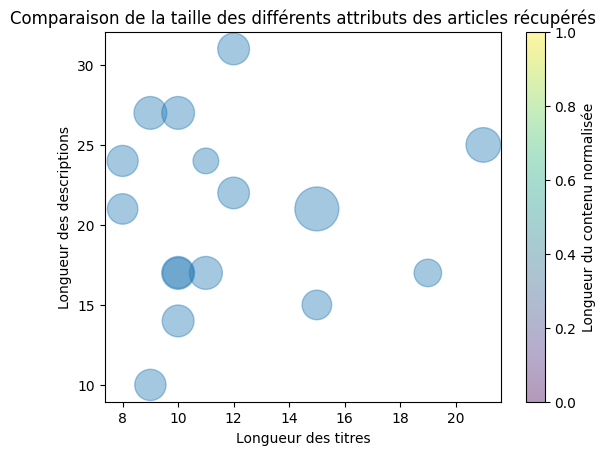

In [230]:
#Comparaison des articles récoltés entre eux selon ces trois dimensions sous forme d'un bubble chart : l'axe X correspond à la longueur du titre, l'axe Y à la longueur de la description et la taille de la bulle représentera la longueur du contenu de l'article.

import matplotlib.pyplot as plt

bubble_size=df['Content_length']/df['Content_length'].max()*1000 #Normalisation de la taille des bulles à des valeurs proches de celles obtenues pour les tailles de titre et de description

plt.scatter(x=df['Title_length'], y=df['Description_length'],s=bubble_size,alpha=0.4)
plt.xlabel('Longueur des titres')
plt.ylabel('Longueur des descriptions')
plt.title('Comparaison de la taille des différents attributs des articles récupérés')
plt.colorbar(label='Longueur du contenu normalisée')
plt.show()

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse des titres et descriptions)

**Nettoyage du texte**

In [231]:
#Fonctions importantes pour la suite 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def cleaning_text(text):
    #Passage du texte en miniscules
    text=text.lower()
    #Suppression des chiffres
    text=re.sub(r'\d+', '', text)
    #Suppression de la ponctuation et des symboles spéciaux
    text=re.sub(r'[^\w\s]', '', text)
    return text


def count_common_words(text):
    words=text.split()
    dict={}
    for el in words :
        if el not in dict:
            dict[el]=1
        else:
            dict[el]+=1
    return dict

def most_common_words(dictionary):
    sorted_dict=dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict

def combine_dictionaries(df,df_column_name):
    combined_dict={}
    column_index=df.columns.get_loc(str(df_column_name))
    for i in range(len(df)):
        temp_dictionary=df.iloc[i,int(column_index)]

        for key, value in temp_dictionary.items():
            if key not in combined_dict:
                combined_dict[key]=value
            else:
                combined_dict[key]+=1
    return combined_dict

stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_stopwords(text):
    words = word_tokenize(text)
    cleaned_text=[word for word in words if word not in stops]
    return ' '.join(cleaned_text)

In [195]:
pip install beautifulsoup4 lxml

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [232]:
df_analyse_1=df.copy()
df_analyse_1['Titre_cleaned']=df_analyse_1['Titre'].apply(cleaning_text)
df_analyse_1['Description_cleaned']=df_analyse_1['Description'].apply(cleaning_text)
df_analyse_1.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12958,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12521,apple leak confirms surprise iphone pro upgrade,iphone pro models will be the first to benefi...
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13484,apple ios release date the coolest iphone upg...,theres a big iphone update coming and its full...
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13650,apple imessage soundly beaten as surprise new ...,forget iphone apple suddenly has a major iphon...
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13609,apple loop apples iphone problem stunning ipa...,this weeks apple headlines apples iphone prob...


In [233]:
df_analyse_1['Counting_Words_Text']=df_analyse_1['Titre_cleaned'].apply(count_common_words)
df_analyse_1['Counting_Words_Description']=df_analyse_1['Description_cleaned'].apply(count_common_words)

df_analyse_1

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned,Counting_Words_Text,Counting_Words_Description
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12958,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...,"{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12521,apple leak confirms surprise iphone pro upgrade,iphone pro models will be the first to benefi...,"{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'iphone': 2, 'pro': 1, 'models': 1, 'will': 1..."
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13484,apple ios release date the coolest iphone upg...,theres a big iphone update coming and its full...,"{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'theres': 1, 'a': 1, 'big': 1, 'iphone': 1, '..."
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13650,apple imessage soundly beaten as surprise new ...,forget iphone apple suddenly has a major iphon...,"{'apple': 1, 'imessage': 1, 'soundly': 1, 'bea...","{'forget': 1, 'iphone': 2, 'apple': 1, 'sudden..."
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13609,apple loop apples iphone problem stunning ipa...,this weeks apple headlines apples iphone prob...,"{'apple': 1, 'loop': 1, 'apples': 1, 'iphone':...","{'this': 1, 'weeks': 1, 'apple': 2, 'headlines..."
5,"Apple iPhone, Watch product design head to lea...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:37:19+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",9,27,14471,apple iphone watch product design head to leav...,tang tan the apple inc executive who headed pr...,"{'apple': 1, 'iphone': 1, 'watch': 1, 'product...","{'tang': 1, 'tan': 1, 'the': 4, 'apple': 2, 'i..."
6,": Apple iPhone, Watch product design head to l...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:30:00+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",10,27,14482,apple iphone watch product design head to lea...,tang tan the apple inc executive who headed pr...,"{'apple': 1, 'iphone': 1, 'watch': 1, 'product...","{'tang': 1, 'tan': 1, 'the': 4, 'apple': 2, 'i..."
7,Apple's latest moves in India underscore data ...,https://www.cnbc.com/2023/12/08/apples-latest-...,2023-12-08 18:20:47+00:00,India's economy is about 16½ years behind Chin...,CNBC,"<!DOCTYPE html><html lang=""en"" prefix=""og=http...",15,21,26008,apples latest moves in india underscore data s...,indias economy is about ½ years behind chinas ...,"{'apples': 1, 'latest': 1, 'moves': 1, 'in': 1...","{'indias': 1, 'economy': 2, 'is': 1, 'about': ..."
8,No-One Cares Which Bank Provides Their Apple Card,https://www.forbes.com/sites/davidbirch/2023/1...,2023-12-08 11:57:45+00:00,So long as my rewards card works and I

In [234]:
#On affiche les mots les plus fréquents dans chaque article

df_analyse_1['Most_common_text']=df_analyse_1['Counting_Words_Text'].apply(most_common_words)
df_analyse_1['Most_common_description']=df_analyse_1['Counting_Words_Description'].apply(most_common_words)
df_analyse_1.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned,Counting_Words_Text,Counting_Words_Description,Most_common_text,Most_common_description
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12958,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...,"{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro...","{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12521,apple leak confirms surprise iphone pro upgrade,iphone pro models will be the first to benefi...,"{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'iphone': 2, 'pro': 1, 'models': 1, 'will': 1...","{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'iphone': 2, 'to': 2, 'pro': 1, 'models': 1, ..."
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13484,apple ios release date the coolest iphone upg...,theres a big iphone update coming and its full...,"{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'theres': 1, 'a': 1, 'big': 1, 'iphone': 1, '...","{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'and': 2, 'theres': 1, 'a': 1, 'big': 1, 'iph..."
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13650,apple imessage soundly beaten as surprise new ...,forget iphone apple suddenly has a major iphon...,"{'apple': 1, 'imessage': 1, 'soundly': 1, 'bea...","{'forget': 1, 'iphone': 2, 'apple': 1, 'sudden...","{'apple': 1, 'imessage': 1, 'soundly': 1, 'bea...","{'iphone': 2, 'forget': 1, 'apple': 1, 'sudden..."
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13609,apple loop apples iphone problem stunning ipa...,this weeks apple headlines apples iphone prob...,"{'apple': 1, 'loop': 1, 'apples': 1, 'iphone':...","{'this': 1, 'weeks': 1, 'apple': 2, 'headlines...","{'apple': 1, 'loop': 1, 'apples': 1, 'iphone':...","{'apple': 2, 'apples': 2, 'this': 1, 'weeks': ..."


In [235]:
#Fonction qui transforme une colonne de dictionnaires d'un dataframe en un seul dictionnaire

combined_dict_text=combine_dictionaries(df_analyse_1,'Most_common_text')
combined_dict_description= combine_dictionaries(df_analyse_1, 'Most_common_description')

combined_dict_text, combined_dict_description


({'forget': 1,
  'the': 5,
  'new': 3,
  'macbook': 3,
  'pro': 2,
  'apple': 15,
  'has': 1,
  'something': 1,
  'much': 1,
  'better': 1,
  'leak': 2,
  'confirms': 1,
  'surprise': 3,
  'iphone': 7,
  'upgrade': 3,
  'ios': 2,
  'release': 1,
  'date': 1,
  'coolest': 1,
  'is': 1,
  'days': 1,
  'away': 1,
  'imessage': 1,
  'soundly': 1,
  'beaten': 1,
  'as': 2,
  'update': 1,
  'goes': 1,
  'live': 1,
  'loop': 1,
  'apples': 2,
  'problem': 1,
  'stunning': 1,
  'ipad': 2,
  'leaks': 1,
  'air': 2,
  'watch': 2,
  'product': 2,
  'design': 2,
  'head': 2,
  'to': 6,
  'leave': 2,
  'report': 3,
  'latest': 2,
  'moves': 1,
  'in': 5,
  'india': 4,
  'underscore': 1,
  'data': 1,
  'showing': 1,
  'its': 1,
  'primed': 1,
  'be': 2,
  'next': 1,
  'china': 1,
  'noone': 1,
  'cares': 1,
  'which': 1,
  'bank': 1,
  'provides': 1,
  'their': 1,
  'card': 1,
  'wants': 1,
  'make': 1,
  'iphones': 2,
  'tata': 1,
  'plans': 3,
  'build': 1,
  'countrys': 1,
  'biggest': 1,
  'fact

In [236]:
import plotly.express as px
from collections import Counter

sorted_text_dictionary=sorted(combined_dict_text.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_text_dictionary]
values=[value for key, value in sorted_text_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les titres d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()


In [237]:
import plotly.express as px
from collections import Counter

sorted_description_dictionary=sorted(combined_dict_description.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

On observe aisément l'omniprésence de mots récurrents (stopwords) dans le corpus étudié. Nous allons donc les enlever et ensuite procéder à la deuxième étape de préparation du texte qui consistera en une lemmatisation et une analyse plus poussée.

In [203]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [204]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [238]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

df_analyse_1['Titre_cleaned_stopwords']=df_analyse_1['Titre_cleaned'].apply(clean_stopwords)
df_analyse_1['Description_cleaned_stopwords']=df_analyse_1['Description_cleaned'].apply(clean_stopwords)


In [239]:
#Mots les plus fréquents après suppression des stopwords
df_analyse_1['Counting_Words_Text_nostopwords']=df_analyse_1['Titre_cleaned_stopwords'].apply(count_common_words)
df_analyse_1['Counting_Words_Descr_nostopwords']=df_analyse_1['Description_cleaned_stopwords'].apply(count_common_words)

combined_dict_text_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_text_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

In [240]:
combined_dict_description_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_description_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse du contenu des articles)

In [253]:
#Mise en place de règles propres à chaque source de données pour récupérer les parties intéressantes

from bs4 import BeautifulSoup
#Fonction adaptée aux articles Forbes et MarketWatch
def clean_html_1(text_html): 
    soup=BeautifulSoup(text_html, 'html.parser')
    title=soup.find_all('h1', class_=True)
    content=soup.find_all('p')
    united_content = ' '.join(el.get_text(strip=True) for el in title + content )
    return united_content

#Fonction adaptée aux articles de CNBC
def clean_html_2(text_html): 
    soup=BeautifulSoup(text_html, 'html.parser')
    title=soup.find_all('h1', class_=True)
    key_points=soup.find_all('li')
    content=soup.find_all('p')
    united_content = ' '.join(el.get_text(strip=True) for el in title + content + key_points )
    return united_content

df_content=df.copy()
df_content['Selected_content'] = df_content.apply(lambda row: clean_html_2(row['Contenu']) if row['Source'] == 'CNBC' else clean_html_1(row['Contenu']), axis=1)


In [254]:
df_content

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Selected_content
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12958,"Forget The New MacBook Pro, Apple Has Somethin..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12521,Apple Leak Confirms Surprise iPhone 16 Pro Upg...
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13484,Apple iOS 17.2 Release Date: The Coolest iPhon...
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13650,Apple iMessage Soundly Beaten As Surprise New ...
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13609,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin..."
5,"Apple iPhone, Watch product design head to lea...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:37:19+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",9,27,14471,"Apple iPhone, Watch product design head to lea..."
6,": Apple iPhone, Watch product design head to l...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:30:00+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",10,27,14482,"Apple iPhone, Watch product design head to lea..."
7,Apple's latest moves in India underscore data ...,https://www.cnbc.com/2023/12/08/apples-latest-...,2023-12-08 18:20:47+00:00,India's economy is about 16½ years behind Chin...,CNBC,"<!DOCTYPE html><html lang=""en"" prefix=""og=http...",15,21,26008,Apple's latest moves in India underscore data ...
8,No-One Cares Which Bank Provides Their Apple Card,https://www.forbes.com/sites/davidbirch/2023/1...,2023-12-08 11:57:45+00:00,So long as my rewards card works and I get my ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,24,13004,No-One Cares Which Bank Provides Their Apple C...
9,Apple Wants To Make 1-In-4 iPhones In India As...,https://www.forbes.com/sites/siladityaray/2023...,2023-12-08 11:48:48+00:00,Apple wants to expand its Indian manufacturing...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",21,25,16170,Apple Wants To Make 1-In-4 iPhones In India As...


In [255]:
df_content['Content_cleaned']=df_content['Titre'].apply(cleaning_text)
df_content.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Selected_content,Content_cleaned
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12958,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12521,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,apple leak confirms surprise iphone pro upgrade
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13484,Apple iOS 17.2 Release Date: The Coolest iPhon...,apple ios release date the coolest iphone upg...
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13650,Apple iMessage Soundly Beaten As Surprise New ...,apple imessage soundly beaten as surprise new ...
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13609,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",apple loop apples iphone problem stunning ipa...


In [257]:


df_content['Counting_Words']=df_content['Content_cleaned'].apply(count_common_words)
df_content['Most_common_text']=df_content['Counting_Words'].apply(most_common_words)

df_content

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Selected_content,Content_cleaned,Counting_Words,Most_common_text
0,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12958,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...,"{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12521,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,apple leak confirms surprise iphone pro upgrade,"{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri..."
2,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13484,Apple iOS 17.2 Release Date: The Coolest iPhon...,apple ios release date the coolest iphone upg...,"{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'apple': 1, 'ios': 1, 'release': 1, 'date': 1..."
3,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13650,Apple iMessage Soundly Beaten As Surprise New ...,apple imessage soundly beaten as surprise new ...,"{'apple': 1, 'imessage': 1, 'soundly': 1, 'bea...","{'apple': 1, 'imessage': 1, 'soundly': 1, 'bea..."
4,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13609,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",apple loop apples iphone problem stunning ipa...,"{'apple': 1, 'loop': 1, 'apples': 1, 'iphone':...","{'apple': 1, 'loop': 1, 'apples': 1, 'iphone':..."
5,"Apple iPhone, Watch product design head to lea...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:37:19+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",9,27,14471,"Apple iPhone, Watch product design head to lea...",apple iphone watch product design head to leav...,"{'apple': 1, 'iphone': 1, 'watch': 1, 'product...","{'apple': 1, 'iphone': 1, 'watch': 1, 'product..."
6,": Apple iPhone, Watch product design head to l...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:30:00+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",10,27,14482,"Apple iPhone, Watch product design head to lea...",apple iphone watch product design head to lea...,"{'apple': 1, 'iphone': 1, 'watch': 1, 'product...","{'apple': 1, 'iphone': 1, 'watch': 1, 'product..."
7,Apple's latest moves in India underscore data ...,https://www.cnbc.com/2023/12/08/apples-latest-...,2023-12-08 18:20:47+00:00,India's economy is about 16½ years behind Chin...,CNBC,"<!DOCTYPE html><html lang=""en"" prefix=""og=http...",15,21,26008,Apple's latest moves in India underscore data ...,apples latest moves in india underscore data s...,"{'apples': 1, 'latest': 1, 'moves': 1, 'in': 1...","{'apples': 1, 'latest': 1, 'moves': 1, 'in': 1..."
8,No-One Cares Which Bank Provides Their Apple Card,https://www.forbes.com/sites/davidbirch/2023/1...,2023-12-08 11:57:45+00:00,So long as my rewards card works and I get m